In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
# This is needed to render the plots
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

In [4]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [6]:
x_train.shape, y_train.shape

((80, 1), (80, 1))

In [8]:
def figure1(x_train, y_train, x_test, y_test):
    # Create scatter plot
    plt.scatter(x_train, y_train, label='Training data')
    plt.scatter(x_test, y_test, label='Testing data')

    # Add labels and legend
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scatter Plot')
    plt.legend()

    # Show the plot
    plt.show()

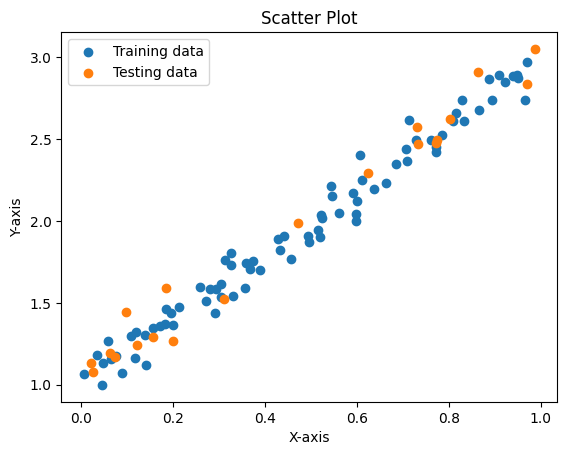

In [9]:
figure1(x_train, y_train, x_test, y_test)

In [10]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


In [11]:
# Step 1 - Computes our model's predicted output - forward pass
y_hat = b + w * x_train

In [15]:
def figure2(x_train, y_train, b, w):
    # Create line plot
    x = np.linspace(0, 10, 100)
    y = w * x + b
    plt.xlim([0, 1])
    plt.plot(x, y, label='Regression Line')
    plt.scatter(x_train, y_train, label='Training data')

    # Add labels and legend
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Linear Regression')
    plt.legend()

    # Show the plot
    plt.show()


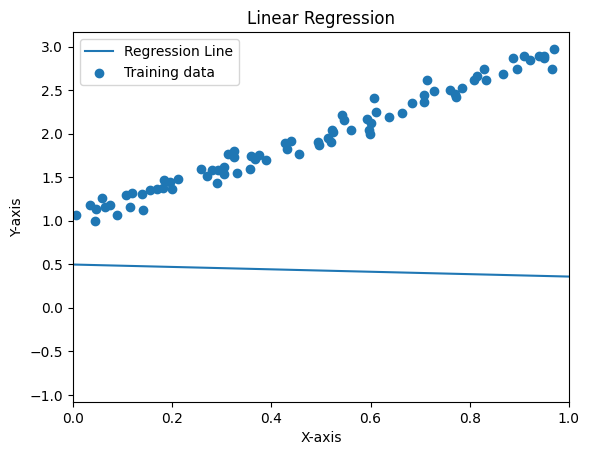

In [16]:
figure2(x_train, y_train, b, w)

In [17]:
print(y_train[0], y_hat[0])

[2.36596945] [0.39881299]


In [22]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (y_hat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss)

2.6401126993616817


In [24]:
def mesh_losses(true_b, true_w, x_train, y_train):
    # Set up arrays of b and w values
    bs = np.linspace(true_b - 5, true_b + 5, 100)
    ws = np.linspace(true_w - 5, true_w + 5, 100)

    # Initialize array for losses
    all_losses = np.zeros((len(bs), len(ws)))

    # Calculate loss for each combination of b and w
    for i, b in enumerate(bs):
        for j, w in enumerate(ws):
            loss = 0
            for x, y in zip(x_train, y_train):
                y_pred = w * x + b
                loss += (y_pred - y) ** 2
            all_losses[i, j] = loss / len(x_train)

    return bs, ws, all_losses

In [25]:
bs, ws, all_losses = mesh_losses(true_b, true_w, x_train, y_train)

In [27]:
def figure4(x_train, y_train, b, w, bs, ws, all_losses):
    # Create contour plot
    fig, ax = plt.subplots(figsize=(8, 6))
    cs = ax.contour(bs, ws, all_losses, levels=10)
    ax.clabel(cs, inline=True, fontsize=10)

    # Plot true b and w values as red dot
    ax.plot(true_b, true_w, 'ro')

    # Plot learned b and w values as green dot
    ax.plot(b, w, 'go')

    # Add labels and title
    plt.xlabel('b')
    plt.ylabel('w')
    plt.title('Contour Plot')

    # Show the plot
    plt.show()


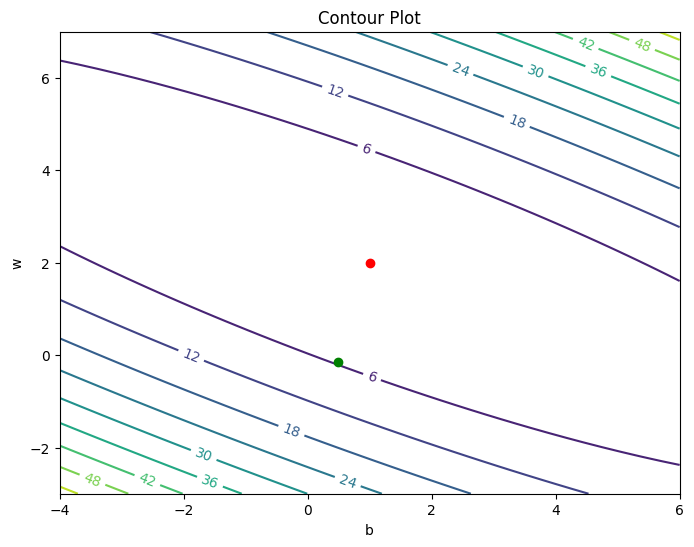

In [28]:
figure4(x_train, y_train, b, w, bs, ws, all_losses)

In [29]:
# Step 3 - Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.0224384959608583 -1.7706733515907813


In [30]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and the 
# learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.798958] [0.03880303]


In [31]:
# Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
lr = 0.3
num_epochs = 50
Losses = np.empty(num_epochs)
for epoch in range(num_epochs):
    y_hat = b + w * x_train
    error = (y_hat - y_train)
    loss = (error ** 2).mean()
    Losses[epoch] = loss
    b_grad = 2 * error.mean()
    w_grad = 2 * (x_train * error).mean()
    b = b - lr * b_grad
    w = w - lr * w_grad

b, w    

(array([1.11648206]), array([1.75056848]))